** <font color='Orange'>Logistic Regression using NumPy</font>**

<font color='red'> Importing packages</font>

In [ ]:
import numpy as np
import pandas as pd
#from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import linear_model

from tqdm import tqdm

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
#Code to run on G-colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#code to run only on G-colab 
gcolab_project_path = '/content/drive/My Drive/AAI/Assignment/Dataset/'
gcolab_project_path

'/content/drive/My Drive/AAI/Assignment/Dataset/'

In [ ]:
#Code to run on G-colab
df_iris = pd.read_csv(gcolab_project_path+'IRIS.csv')

In [ ]:
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Sort 'species' column by descending order to classify the target into 
#binary classification such as virginica and Non-virginica.

df_iris.sort_values(by=['species'], ascending=False, inplace=True)
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
149,5.9,3.0,5.1,1.8,Iris-virginica
111,6.4,2.7,5.3,1.9,Iris-virginica
122,7.7,2.8,6.7,2.0,Iris-virginica
121,5.6,2.8,4.9,2.0,Iris-virginica
120,6.9,3.2,5.7,2.3,Iris-virginica


In [ ]:
#glimpse of presence of species column
df_iris.species[0:49], df_iris.species[50:99], df_iris.species[100:]

(149    Iris-virginica
 111    Iris-virginica
 122    Iris-virginica
 121    Iris-virginica
 120    Iris-virginica
 119    Iris-virginica
 118    Iris-virginica
 117    Iris-virginica
 116    Iris-virginica
 115    Iris-virginica
 114    Iris-virginica
 112    Iris-virginica
 110    Iris-virginica
 124    Iris-virginica
 109    Iris-virginica
 108    Iris-virginica
 107    Iris-virginica
 106    Iris-virginica
 105    Iris-virginica
 104    Iris-virginica
 103    Iris-virginica
 102    Iris-virginica
 101    Iris-virginica
 100    Iris-virginica
 123    Iris-virginica
 113    Iris-virginica
 125    Iris-virginica
 137    Iris-virginica
 126    Iris-virginica
 147    Iris-virginica
 146    Iris-virginica
 145    Iris-virginica
 144    Iris-virginica
 143    Iris-virginica
 142    Iris-virginica
 141    Iris-virginica
 140    Iris-virginica
 139    Iris-virginica
 138    Iris-virginica
 148    Iris-virginica
 136    Iris-virginica
 131    Iris-virginica
 128    Iris-virginica
 129    Iri

In [ ]:
#Encoding Virginica to 1 and rest of species as Non-virginica to 0

virginica = [1 for i in range(50)]  #1st 50 dataset is virginica
non_virginica = [0 for i in range(100)] #final 100 dataset is non-virginica

In [ ]:
#concatenate the newly encoded values 
y = np.concatenate([virginica,non_virginica ])

In [ ]:
#Replaces existing species column with the newly encoded y values
df_iris['species'] = y
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
149,5.9,3.0,5.1,1.8,1
111,6.4,2.7,5.3,1.9,1
122,7.7,2.8,6.7,2.0,1
121,5.6,2.8,4.9,2.0,1
120,6.9,3.2,5.7,2.3,1


In [ ]:
#Just for an affirmation that the non-virginica is coded to 0
df_iris.species[50:60], df_iris.species[144:150]

(88    0
 78    0
 79    0
 80    0
 81    0
 82    0
 83    0
 84    0
 85    0
 86    0
 Name: species, dtype: int64, 32    0
 31    0
 30    0
 29    0
 28    0
 0     0
 Name: species, dtype: int64)

In [ ]:
#Split X and y (features and target) after encoding of species column
X = df_iris.iloc[:,[0,1,2,3]]
y = df_iris.iloc[:,4]
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [ ]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
149,5.9,3.0,5.1,1.8
111,6.4,2.7,5.3,1.9
122,7.7,2.8,6.7,2.0
121,5.6,2.8,4.9,2.0
120,6.9,3.2,5.7,2.3


In [ ]:
y.head(), y.tail()

(149    1
 111    1
 122    1
 121    1
 120    1
 Name: species, dtype: int64, 31    0
 30    0
 29    0
 28    0
 0     0
 Name: species, dtype: int64)

In [ ]:
#Random permutation for shuffling the dataset
perm = np.random.permutation(150)
type(perm), perm

(numpy.ndarray,
 array([138,  48, 127,  44,  52, 131,  66,  23,  18,   0,  39, 147,  82,
          2,  72, 130,  84,  38,  14,  85, 123,  92, 108, 133,  81,  17,
         55,  70,  11,  94,  26,  69,  93, 149, 137, 106,  50, 128,  28,
         35, 132, 102, 129, 110,  77, 136,  65,  74,  53, 121,  78,  22,
         96,  40,  33, 101, 122,  59,  45,   3,  31,  41,  34,  88,   6,
          8,  71,  73, 148,  95, 114, 117,  89,  10,  37, 119,  79, 142,
        112,  25,   4,  91, 107, 104,  54, 118,  61,  13,  46,  43, 105,
          9, 134, 115,  75,  80, 144,  57, 135,  21, 126,  68,  36, 103,
         19,  30,  98,  97, 100,  67,  56,  20, 120,   1,  47,  90, 145,
         62, 124,  83, 146,  64,   5, 139,  42,  86,  24,  15,  27, 113,
        141,  76,  29, 109,  63,   7,  16, 111,  87,  60, 116,  51,  58,
        140, 125,  12,  49, 143,  99,  32]))

In [ ]:
#Shuffle the datset by the generated Permutation number indices
X_train, X_test =  X.iloc[perm][20:], X.iloc[perm][:20]
y_train, y_test =  y.iloc[perm][20:], y.iloc[perm][:20]

In [ ]:
print("Dataset Shape:")
print("==============")
print(f"X_train: {X_train.shape} y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}\t y_test: {y_test.shape}")

Dataset Shape:
X_train: (130, 4) y_train: (130,)
X_test: (20, 4)	 y_test: (20,)


In [ ]:
#Reshape label /target column to attain a 2D array 
#Helps python broadcasting to compute the correct values once we apply our linear algebra
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [ ]:
print("Dataset Shape - Post reshaping the Label/Target column:")
print("======================================================")
print(f"X_train: {X_train.shape} y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}\t y_test: {y_test.shape}")

Dataset Shape - Post reshaping the Label/Target column:
X_train: (130, 4) y_train: (130, 1)
X_test: (20, 4)	 y_test: (20, 1)


In [ ]:
#Pick two important features alone for classification
X_train = X_train.iloc[:, 2:]
X_test = X_test.iloc[:, 2:]

In [ ]:
#Picks only Petal Length and Petal Width - important features 
X_train.head()

,petal_length,petal_width
25,1.6,0.2
67,4.1,1.0
21,1.5,0.4
44,1.9,0.4
55,4.5,1.3


In [ ]:
print("Dataset Shape - Post restricting to two features:")
print("======================================================")
print(f"X_train: {X_train.shape} y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}\t y_test: {y_test.shape}")

Dataset Shape - Post restricting to two features:
X_train: (130, 2) y_train: (130, 1)
X_test: (20, 2)	 y_test: (20, 1)


# <font color='blue' size=5>Visuzaliation Function for Plotting</font>

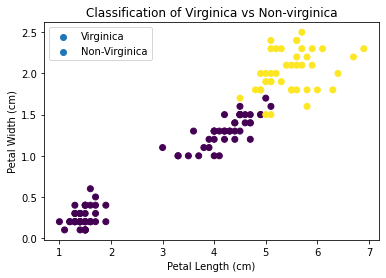

<Figure size 3600x3600 with 0 Axes>

In [ ]:
plt.scatter(X_train.iloc[0:49, 0], X_train.iloc[0:49, 1], c=y_train[0:49])
plt.scatter(X_train.iloc[50:149, 0], X_train.iloc[50:149, 1], c=y_train[50:149])

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.title('Classification of Virginica vs Non-virginica')
plt.legend(['Virginica', 'Non-Virginica'], loc='upper left')

plt.figure(figsize =(50, 50)) 

plt.show()

**Inference: On Scatter Plot. ome overlapping data points but these features do a reasonable job in separating our classes**

**Sigmoid Function**

In [ ]:
def Sigmoid(z):
  
  return 1.0 / (1.0 + np.exp(-z))

**Sigmoid -Visualization Plotting**

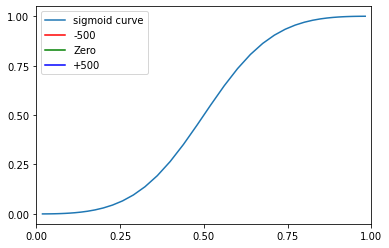

<Figure size 3600x3600 with 0 Axes>

In [ ]:
f, axes = plt.subplots(1,1)

plt.plot(Sigmoid(np.linspace(-4,4)), Sigmoid(np.linspace(-10,10)))
plt.xlim(0,1)

axes.plot(0.01, Sigmoid(-500), 'r')
axes.plot(0.50, Sigmoid(0), 'g')
axes.plot(0.99, Sigmoid(500), 'b')

plt.xticks([0,0.25,0.50,0.75,1])
plt.yticks([0,0.25,0.50,0.75,1])

axes.legend(['sigmoid curve', '-500', 'Zero', '+500'])
plt.figure(figsize =(50, 50)) 
plt.show()

**Logistic-Loss or Cross-Entropy Function**

In [ ]:
def logistic_loss(y, y_hat):
  # y -> actual given true value
  # y_hat -> our model prediction

  return -np.mean(y * np.log(y_hat)) + (1-y) * np.log(1 - y_hat)

Step: 1
Initialize Weights and Bias 

In [ ]:
def initialize_weights(dim):

    print('Dim: ', dim)
    w = np.zeros(dim)
    b = 0
    return w,b

**Parameters Initialization**

In [ ]:
x_dim = (X_train.shape[1],1)
learning_rate = 0.01
epochs = 1000

weight,bias = initialize_weights(x_dim)

print(f"Initial Weights: \n{weight}\nInitial Bias:\t{bias}\n")
print(f"Learning Rate:\t{learning_rate}\nEpochs:{epochs}")

Dim:  (2, 1)
Initial Weights: 
[[0.]
 [0.]]
Initial Bias:	0

Learning Rate:	0.01
Epochs:1000


**Train the Model**

In [ ]:
def train_model(X_train, y_train, weight, bias, epochs):

  train_loss = []
  print('epochs ', epochs)
  m = len(y_train)

  X_train = np.array(X_train)

  for iteration in tqdm(range(epochs)):
    
      Z = np.matmul(X_train, weight) + bias
      y_hat = Sigmoid(Z)

      loss = logistic_loss(y_train, y_hat)
      diff_in_predcn = y_hat - y_train

      dw = 1/m * np.matmul(X_train.T, diff_in_predcn)
      db = np.sum(diff_in_predcn)

      weight = weight - learning_rate * dw
      bias = bias - learning_rate * db

      train_loss.append(loss)

  return weight, bias, train_loss, y_hat

In [ ]:
Weight, Bias, train_loss, y_hat = train_model(X_train, y_train, weight, bias, epochs)


print("\nTraining Loss:")
print("================")
for iteration in range(len(train_loss)):
    if iteration%100 == 0:     
        print(f" {iteration}/{epochs} | Loss: {train_loss[iteration]}")

In [ ]:
print(f"Weight: {Weight}\nBias: {Bias}")

Weight: [[1.33430738]
 [0.80817597]]
Bias: -7.89597935324034


***Analyze the predictions made by the model during training ***

In [ ]:
def predict_train(y_pred):

  preds = []

  for each_pred in y_pred:
    if each_pred > 0.5:
      preds.append(1)
    else:
      preds.append(0)

  return preds

**Compute F! Score using SK Learn**

In [ ]:
train_pred = predict_train(y_hat)

from sklearn.metrics import f1_score
f1_score(train_pred, y_train)

0.9382716049382716

**Inference on F1-Score: 0.95**

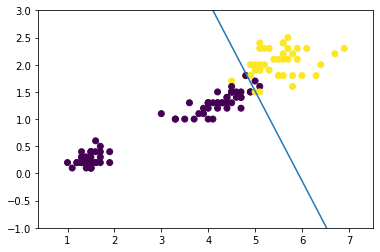

In [ ]:
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train.ravel())

ax = plt.gca()

xvals = np.array(ax.get_xlim()).reshape(-1, 1)
yvals = -(xvals * Weight[0][0] + Bias) / Weight[1][0]

plt.plot(xvals, yvals)
plt.ylim(-1, 3)

plt.show()

**Test the Model**

In [ ]:
def predict_test(weight, bias):

    
    test_predict = []
    x_test = np.array(X_test)
    N = len(x_test)

    for idx in range(N):
        z=np.matmul(weight.T,x_test[idx].reshape(-1,1) )+bias
        
        if Sigmoid(z) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            test_predict.append(1)
        else:
            test_predict.append(0)
    return test_predict

In [ ]:
test_predict = predict_test(Weight, Bias)
print(test_predict)

[0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0]


In [ ]:
print(y_test); 

[[0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]]


In [ ]:
print( (1-np.sum(y_test  - test_predict)) /len(X_test))

-0.95


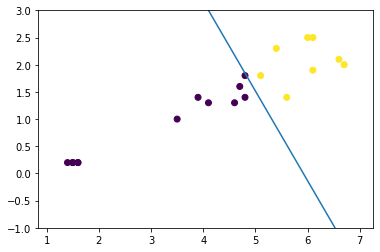

In [ ]:
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=test_pred.ravel())

ax = plt.gca()

xvals = np.array(ax.get_xlim()).reshape(-1, 1)
yvals = -(xvals * Weight[0][0] + Bias) / Weight[1][0]

plt.plot(xvals, yvals)
plt.ylim(-1, 3)

plt.show()